In [5]:
# Load libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import * 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [6]:
url = "F:/ML/Git ML/IncomeSlabPrediction/IncomeSlabsDatsaset.csv"
names = ['age', 'work-class', 'fnlwght', 'education','education-num', 'marital staus','occupation','relationship',
         'race','gender','capital gain','capital loss','hours per week','native-country','income slab']
df = pd.read_csv(url, names = names)
df.head()

,age,work-class,fnlwght,education,education-num,marital staus,occupation,relationship,race,gender,capital gain,capital loss,hours per week,native-country,income slab
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
#replace unknowns with nan
dfn= df.replace(to_replace=" ?", value = np.nan)
dfn.head()

,age,work-class,fnlwght,education,education-num,marital staus,occupation,relationship,race,gender,capital gain,capital loss,hours per week,native-country,income slab
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
#getting the list of columns with nan
ml= dfn.columns[dfn.isna().any()].tolist()
ml

['work-class', 'occupation', 'native-country']

In [9]:
#filling the nans with the ratio
dfm=dfn
#drc = pd.DataFrame(columns = ml)
for item in  ml:
    #getting the ratio of the index labels
    val =pd.DataFrame(dfn[item].value_counts(normalize=True))
    print ("The probability ratio before filling the missing vlaues in %s is" % item )
    print (dfn[item].value_counts(normalize=True))
    #index labels in a list
    valr = val.index.tolist()
    #drc.index = valr
    #columns values in a list
    valc =val[item].tolist()
    #replacing the nan values with ratio
    dfm[item] = dfm[item].fillna(pd.Series(np.random.choice(valr,p=valc, size=len(dfm))))
    #sanity check
    print ("The probability ratio after filling the missing vlaues in %s is" % item )
    print ((dfm[item].value_counts(normalize=True)))

The probability ratio before filling the missing vlaues in work-class is
 Private             0.738682
 Self-emp-not-inc    0.082701
 Local-gov           0.068120
 State-gov           0.042246
 Self-emp-inc        0.036322
 Federal-gov         0.031245
 Without-pay         0.000456
 Never-worked        0.000228
Name: work-class, dtype: float64
The probability ratio after filling the missing vlaues in work-class is
 Private             0.739136
 Self-emp-not-inc    0.082430
 Local-gov           0.067842
 State-gov           0.042597
 Self-emp-inc        0.036178
 Federal-gov         0.031049
 Without-pay         0.000553
 Never-worked        0.000215
Name: work-class, dtype: float64
The probability ratio before filling the missing vlaues in occupation is
 Prof-specialty       0.134774
 Craft-repair         0.133440
 Exec-managerial      0.132365
 Adm-clerical         0.122729
 Sales                0.118823
 Other-service        0.107266
 Machine-op-inspct    0.065174
 Transport-moving  

In [10]:
#dependent variable
dfy=dfm.iloc[:,-1]
#independent variable
dfxm=dfm.iloc[:,:-1]
dfxm.head()

,age,work-class,fnlwght,education,education-num,marital staus,occupation,relationship,race,gender,capital gain,capital loss,hours per week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [11]:
#converting categorical data to numerical
dfxmc=pd.get_dummies(dfxm)
dfxmc.head()

,age,fnlwght,education-num,capital gain,capital loss,hours per week,work-class_ Federal-gov,work-class_ Local-gov,work-class_ Never-worked,work-class_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#normalizing
dfxmcn = (dfxmc-dfxmc.min())/(dfxmc.max()-dfxmc.min())
dfxmcn.head()

,age,fnlwght,education-num,capital gain,capital loss,hours per week,work-class_ Federal-gov,work-class_ Local-gov,work-class_ Never-worked,work-class_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#binary conversion
dfy.replace(to_replace=" <=50K", value = 1, inplace= True, axis=1)
dfy.replace(to_replace=" >50K", value = 0, inplace= True, axis=1)
dfy.head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    0
15    1
16    1
17    1
18    1
19    0
Name: income slab, dtype: int64

In [14]:
#defing the ROC curve
def ROCcurve(fpr, tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    return (plt.show())

In [15]:
#defining a function for adjusted r square
def adjustedR(Ytest,ypredict,n,p):
    r2 = r2_score(Ytest,ypredict)
    adjustedr2 = 1-((1-r2)*((n-1)/(n-p-1)))
    #where n is number of observations in sample and p is number of independent variables in model
    return abs(adjustedr2)

In [16]:
#defing the training and validation datasets
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(dfxmcn, dfy, test_size=0.20, random_state=7)

In [115]:
#listing out the different ML Algorithms
models = []
models.append(('Logistic Regression with l1 penalty', LogisticRegression(penalty='l1',random_state= 7)))
models.append(('Logistic Regression with l2 penalty', LogisticRegression(penalty='l2',random_state= 7,dual=False)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
models.append(('Random Forest with Entropy', RandomForestClassifier(n_estimators=500, criterion= "entropy", random_state= 7)))
models.append(('Random Forest with gini', RandomForestClassifier(n_estimators=500, criterion= "gini", random_state= 7)))
models.append(('DecisionTree with entropy', DecisionTreeClassifier(criterion= "entropy", random_state= 7)))
models.append(('DecisionTree with gini', DecisionTreeClassifier(criterion= "gini", random_state= 7)))
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))

In [116]:
#function to run the models for the datasets
def allmodels():
    model_list = pd.DataFrame(columns=("Model","Accuracy","F1Score","Diff of Adj R and R")) 
    rownumber = 0
    for name, model in models:
        classifier = model
        classifier.fit(X_train, Y_train)
        # prediction
        Y_predict = classifier.predict(X_test)
        fpr, tpr, thresholds = roc_curve(Y_test, Y_predict, pos_label=1)
        print(name,ROCcurve(fpr, tpr))
        r2 = abs(r2_score(Y_test,Y_predict))
        adjustedr = abs(adjustedR(Y_test,Y_predict,len(dfxmcn),len(dfxmcn.columns)))
        model_list.loc[rownumber,"Model"]= name
        model_list.loc[rownumber,"Accuracy"] = round(((accuracy_score(Y_test,Y_predict))*100))
        model_list.loc[rownumber,"F1Score"]= round((f1_score(Y_test,Y_predict)),3)
        model_list.loc[rownumber,"Diff of Adj R and R"] = round ((adjustedr-r2),3)
        #print (confusion_matrix(Y_test,Y_predict))
        rownumber += 1
    return (model_list)



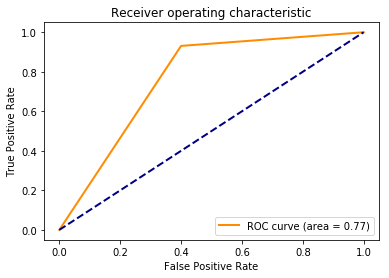

Logistic Regression with l1 penalty None


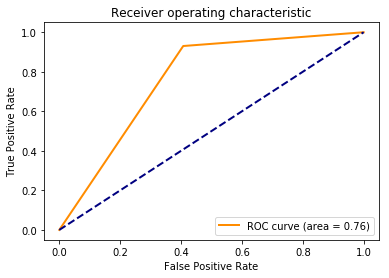

Logistic Regression with l1 penalty None


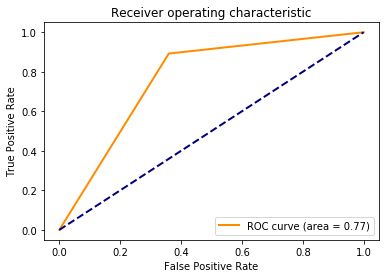

KNN None


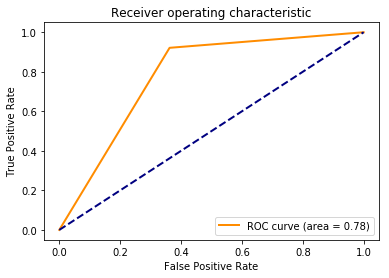

Random Forest with Entropy None


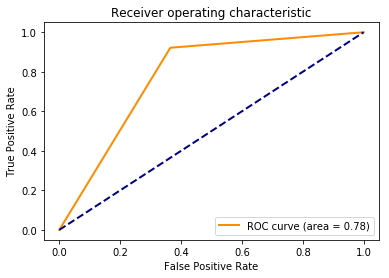

Random Forest with gini None


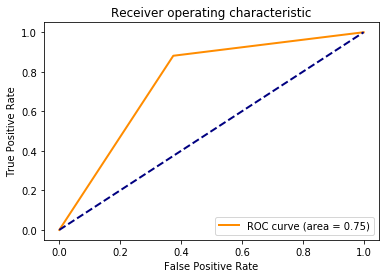

DecisionTree with entropy None


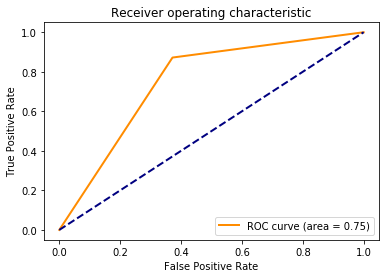

DecisionTree with gini None


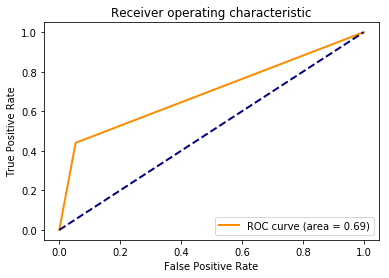

Gaussian Naive Bayes None


F:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


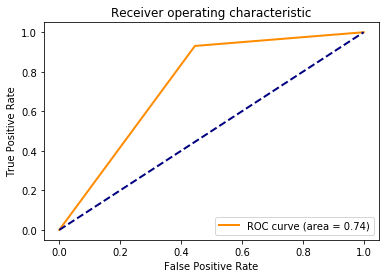

Linear Discriminant Analysis None
                                 Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       85   0.905              -0.003
1  Logistic Regression with l1 penalty       85   0.904              -0.003
2                                  KNN       83    0.89              -0.003
3           Random Forest with Entropy       85   0.905              -0.003
4              Random Forest with gini       85   0.905              -0.003
5            DecisionTree with entropy       82   0.881              -0.003
6               DecisionTree with gini       81   0.877               0.003
7                 Gaussian Naive Bayes       56   0.605               0.008
8         Linear Discriminant Analysis       84   0.899              -0.003


In [117]:
analysisdf = allmodels()
print (analysisdf)

Here the difference of adj R and r is less so we can rule out the possibility of over fitting. Logistic regression and Random Forest has the highest accuracy and f1 score but Random Forest is better because it has the highest AOC.

Now lets reduce the dimensions and see.

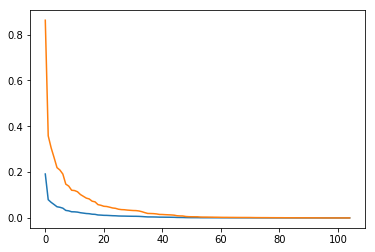

In [55]:
#PCA
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(dfxmcn, dfy, test_size=0.20, random_state=7)
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
ev= pca.explained_variance_ratio_
plt.plot(ev)
var_values = pca.explained_variance_
plt.plot(var_values)

So we can say that the 20- 40 PCs can explain for the maximum variance. So lets transform these to these pcs and see the accuracy difference.

In [59]:
for i in range(20,41):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(dfxmcn, dfy, test_size=0.20, random_state=7)
    pca = PCA(n_components= i)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    ev= pca.explained_variance_ratio_
    pcadf = allmodels()
    print (i,pcadf)

20                                  Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       83   0.891              -0.003
1  Logistic Regression with l1 penalty       83   0.891              -0.003
2                                  KNN       82   0.883              -0.003
3           Random Forest with Entropy       82   0.883              -0.003
4              Random Forest with gini       82   0.884              -0.003
5            DecisionTree with entropy       77   0.848               0.004
6               DecisionTree with gini       77   0.848               0.004
7                 Gaussian Naive Bayes       74   0.819               0.005
8         Linear Discriminant Analysis       83   0.889              -0.003
21                                  Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       83   0.891              -0.003
1  Logistic Regression with l1 penalty       83   0.892              -0.003
2     

31                                  Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       83   0.889              -0.003
1  Logistic Regression with l1 penalty       83   0.889              -0.003
2                                  KNN       82   0.885              -0.003
3           Random Forest with Entropy       82   0.885              -0.003
4              Random Forest with gini       82   0.885              -0.003
5            DecisionTree with entropy       78   0.854               0.004
6               DecisionTree with gini       77   0.848               0.004
7                 Gaussian Naive Bayes       76   0.836               0.004
8         Linear Discriminant Analysis       82   0.888              -0.003
32                                  Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       83    0.89              -0.003
1  Logistic Regression with l1 penalty       83    0.89              -0.003
2     

Here we can see that the accuracy actually decreases. This could be because all the original dimensions would be heavily biased. Hence we PCA transformation in this is not advisable.

Hence we can go for Random forest on the original dimensions to get the best model.